# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

counter = 0
set = 1
temp=[]
lat=[]
lng=[]
hum=[]
cloud=[]
wind=[]
country=[]
max_temp=[]
min_temp=[]
date=[]
cty=[]

for city in cities:
    try:
        
        if counter == 0:
            print("Beginning Data Retrieval")
            print("-----------------------------")
        counter += 1           
        print(f"Processing Record {counter} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        cloud.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cty.append(city)
        time.sleep(1)
        if counter >= 50:
            set += 1
            counter = 0
    except(KeyError, IndexError):
        print("City not found.. Skipping")
        pass
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | wattegama
Processing Record 6 of Set 1 | san cristobal
Processing Record 7 of Set 1 | bolungarvik
City not found.. Skipping
Processing Record 8 of Set 1 | nobeoka
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | oktyabrskoye
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | high level
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | abu samrah
Process

Processing Record 36 of Set 4 | riyadh
Processing Record 37 of Set 4 | labuhan
Processing Record 38 of Set 4 | sorvag
City not found.. Skipping
Processing Record 39 of Set 4 | ambilobe
Processing Record 40 of Set 4 | saposoa
Processing Record 41 of Set 4 | mahajanga
Processing Record 42 of Set 4 | conceicao da barra
Processing Record 43 of Set 4 | nyagan
Processing Record 44 of Set 4 | beloha
Processing Record 45 of Set 4 | mujiayingzi
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | lenoir city
Processing Record 48 of Set 4 | kerman
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | lazaro cardenas
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 5 | udachnyy
Processing Record 2 of Set 5 | sakakah
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | tigil
Processing Record 8 o

Processing Record 24 of Set 8 | atar
Processing Record 25 of Set 8 | bayevo
Processing Record 26 of Set 8 | am timan
Processing Record 27 of Set 8 | pasca
Processing Record 28 of Set 8 | leh
Processing Record 29 of Set 8 | diego de almagro
Processing Record 30 of Set 8 | mao
Processing Record 31 of Set 8 | chiredzi
Processing Record 32 of Set 8 | stornoway
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | gorontalo
Processing Record 35 of Set 8 | shenjiamen
Processing Record 36 of Set 8 | potosi
Processing Record 37 of Set 8 | tabiauea
City not found.. Skipping
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | mingshui
Processing Record 41 of Set 8 | cartagena
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | stoyba
City not found.. Skipping
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | murgab
Processin

Processing Record 4 of Set 12 | santa maria del oro
Processing Record 5 of Set 12 | lorengau
Processing Record 6 of Set 12 | salekhard
Processing Record 7 of Set 12 | sartell
Processing Record 8 of Set 12 | novobirilyussy
Processing Record 9 of Set 12 | ajdabiya
Processing Record 10 of Set 12 | rapid valley
Processing Record 11 of Set 12 | evenskjaer
City not found.. Skipping
Processing Record 12 of Set 12 | turukhansk
Processing Record 13 of Set 12 | biak
Processing Record 14 of Set 12 | siderno
Processing Record 15 of Set 12 | pampierstad
Processing Record 16 of Set 12 | dhali
Processing Record 17 of Set 12 | yeletskiy
City not found.. Skipping
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | devonport
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | prince rupert
Processing Record 22 of Set 12 | atambua
Processing Record 23 of Set 12 | vila
Processing Record 24 of Set 12 | pembroke
Processing Record 25 of Set 12 | carora
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
cities_dict = {"City":cty, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Min Temp": min_temp, "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
city_data = pd.DataFrame(cities_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,64.99,60.80,72,75,1.12,AU,1609711992
1,qaanaaq,77.48,-69.36,2.01,2.01,83,82,3.53,GL,1609712078
2,lavrentiya,65.58,-171.00,-6.02,-6.02,90,85,15.14,RU,1609712079
3,tiksi,71.69,128.87,-23.73,-23.73,84,43,3.38,RU,1609712080
4,wattegama,6.80,81.48,75.20,75.20,100,75,5.82,LK,1609712082


In [85]:
city_data.describe()

,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.809753,19.151537,49.809435,48.944523,75.123675,54.049470,7.934770,1.609712e+09
std,33.203114,90.133497,31.777797,31.641898,19.065390,38.997359,6.020031,2.157263e+02
min,-54.800000,-179.170000,-43.600000,-43.600000,17.000000,0.000000,0.270000,1.609712e+09
25%,-6.967500,-62.265000,30.995000,30.200000,67.000000,13.000000,3.765000,1.609712e+09
50%,23.980000,22.875000,60.800000,60.180000,80.000000,66.500000,6.520000,1.609712e+09
75%,46.322500,99.397500,75.462500,75.000000,88.000000,90.000000,10.512500,1.609713e+09
max,78.220000,179.320000,91.400000,91.400000,100.000000,100.000000,37.200000,1.609713e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
clean_city_data = city_data.loc[city_data["Humidity"] <= 100]
#clean_city_data.head()
clean_city_data.describe()

,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.809753,19.151537,49.809435,48.944523,75.123675,54.049470,7.934770,1.609712e+09
std,33.203114,90.133497,31.777797,31.641898,19.065390,38.997359,6.020031,2.157263e+02
min,-54.800000,-179.170000,-43.600000,-43.600000,17.000000,0.000000,0.270000,1.609712e+09
25%,-6.967500,-62.265000,30.995000,30.200000,67.000000,13.000000,3.765000,1.609712e+09
50%,23.980000,22.875000,60.800000,60.180000,80.000000,66.500000,6.520000,1.609712e+09
75%,46.322500,99.397500,75.462500,75.000000,88.000000,90.000000,10.512500,1.609713e+09
max,78.220000,179.320000,91.400000,91.400000,100.000000,100.000000,37.200000,1.609713e+09


In [87]:
#  Get the indices of cities that have humidity over 100%.
humidity_list = city_data.index[city_data['Humidity'] > 100].tolist()
humidity_list

[]

In [88]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleancity_data = city_data.drop(humidity_list)
cleancity_data.head()

,City,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,64.99,60.80,72,75,1.12,AU,1609711992
1,qaanaaq,77.48,-69.36,2.01,2.01,83,82,3.53,GL,1609712078
2,lavrentiya,65.58,-171.00,-6.02,-6.02,90,85,15.14,RU,1609712079
3,tiksi,71.69,128.87,-23.73,-23.73,84,43,3.38,RU,1609712080
4,wattegama,6.80,81.48,75.20,75.20,100,75,5.82,LK,1609712082


In [ ]:
city_data.to_csv("Output\City_Data_Output.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

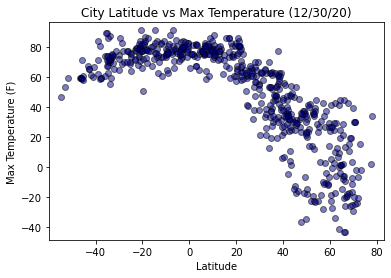

In [89]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Max Temperature (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Output\Lat_MaxTemp_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and their max temperature, 
#reflecting if a max temp increases or decreases as latitude increases.

## Latitude vs. Humidity Plot

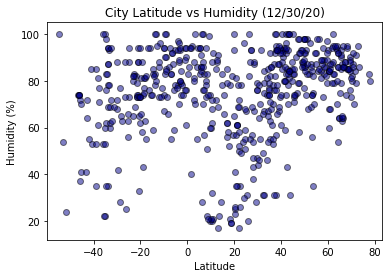

In [90]:
y_values = clean_city_data["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Humidity (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output\Lat_Humidity_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and their humidity,
#showing how a city's latitude impacts it's max humidity.

## Latitude vs. Cloudiness Plot

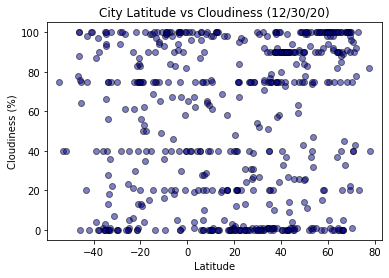

In [91]:
y_values = clean_city_data["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Cloudiness (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output\Lat_Cloudiness_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and the cloudiness,
#to demonstrate how cloudiness behaves as a latitude changes.

## Latitude vs. Wind Speed Plot

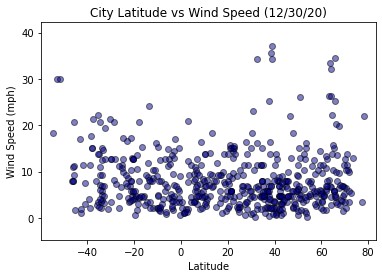

In [92]:
y_values = clean_city_data["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolor='darkblue', edgecolors='black', alpha = 0.5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.ylim(min(y_values)-5,max(y_values)+5)
plt.title("City Latitude vs Wind Speed (12/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output\Lat_WindSpeed_Scatter.png")

#The chart coded is analyzing the relationship between a city's latitude and wind speed,
#reflecting how wind speed varies as latitude increases.

## Linear Regression

In [93]:
north_hemi = clean_city_data.loc[clean_city_data["Lat"]>=0]
south_hemi = clean_city_data.loc[clean_city_data["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8330000033320873


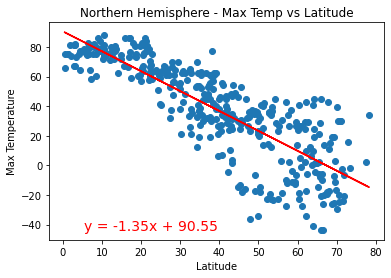

In [111]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(north_hemi["Lat"])+5,min(north_hemi["Max Temp"])),fontsize=14,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude")
plt.show
plt.savefig("Output\Lat_MaxTemp_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5317493939898486


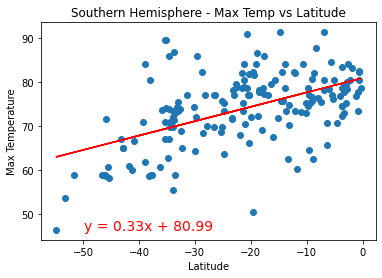

In [112]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(south_hemi["Lat"])+5,min(south_hemi["Max Temp"])),fontsize=14,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.show
plt.savefig("Output\Lat_MaxTemp_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#These two charts reflect the relationship a city's temperature has with it's latitude.
#We can conclude that as a city is closer to the equator (latitude closer to 0) it's max temperature is higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.34535979219665885


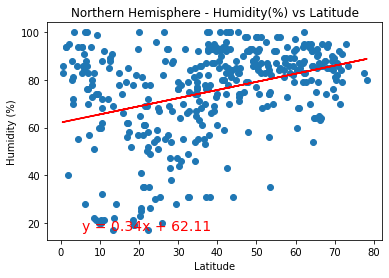

In [113]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(north_hemi["Lat"])+5,min(north_hemi["Humidity"])),fontsize=14,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs Latitude")
plt.show
plt.savefig("Output\Lat_Humidity_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.4014751220840355


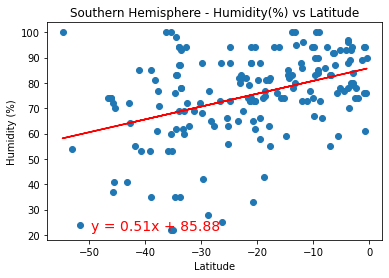

In [114]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(south_hemi["Lat"])+5,min(south_hemi["Humidity"])),fontsize=14,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs Latitude")
plt.show
plt.savefig("Output\Lat_Humidity_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")
#From the charts and linear regression analysis we can conclude that there isn't a strong relationship
#between humidity and a city's latitude. Initial thoughts would be that as you get nearer to the equator
#humidity would be higher, however data differs from that thought.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2581283824650204


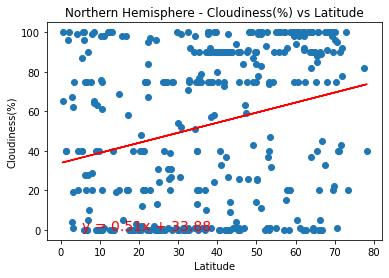

In [115]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(north_hemi["Lat"])+5,min(north_hemi["Cloudiness"])),fontsize=14,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs Latitude")
plt.show
plt.savefig("Output\Lat_Cloudiness_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.15931746266464542


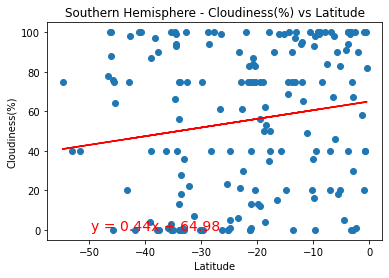

In [116]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(south_hemi["Lat"])+5,min(south_hemi["Cloudiness"])),fontsize=14,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs Latitude")
plt.show
plt.savefig("Output\Lat_Cloudiness_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#From the charts and the analysis we can deduct that cloudiness increases as we steer away from the equator.
#However, the relationship between these two factors is not very strong, but it exists.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1071084174365246


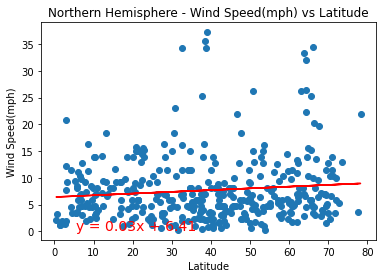

In [117]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(north_hemi["Lat"])+5,min(north_hemi["Wind Speed"])),fontsize=14,color="red")
plt.title("Northern Hemisphere - Wind Speed(mph) vs Latitude")
plt.show
plt.savefig("Output\Lat_WindSpeed_NorthHemi_Regression.png")
print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2807332744161779


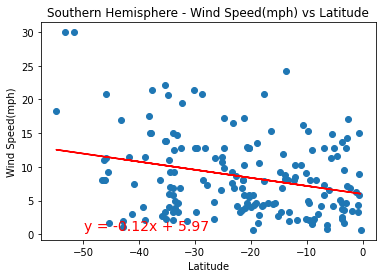

In [118]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(min(south_hemi["Lat"])+5,min(south_hemi["Wind Speed"])),fontsize=14,color="red")
plt.title("Southern Hemisphere - Wind Speed(mph) vs Latitude")
plt.show
plt.savefig("Output\Lat_WindSpeed_SouthHemi_Regression.png")
print(f"The r-value is {rvalue}")

#After the analysis of wind speed vs latitude we can tell there is a correlation between these two factors. 
#We can conlcude that wind speeds reduce as we are closer to the equator.